<a href="https://colab.research.google.com/github/samp3209/datamining/blob/main/TaxDataToIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
import matplotlib.pyplot as plt

In [ ]:
#importing the data and restructuring the variety column to be integers instead of string
data = pd.read_csv('iris.csv')
#print(data.head())
print(data.value_counts(['variety']))
var = data['variety']
#data['variety'] = np.where(data['variety'] == 'Setosa', 0,1)
var[var.isin(data.value_counts(['variety']).index[0])] = 3
var[var.isin(data.value_counts(['variety']).index[0])] = 2
var[var.isin(data.value_counts(['variety']).index[0])] = 1

data['variety'] =  var
data['variety'] = data.variety.astype(float)
data.dtypes

variety   
Virginica     50
Versicolor    50
Setosa        50
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety         float64
dtype: object

In [ ]:
#finding the feature with the largest standard deviation
data.describe()
feature = data.std().sort_values(ascending=False)[0:1]
print(feature)
#testing the feature and creating a model to train for variety
xb = np.array(data[feature.index[0]])
xb = xb.reshape(-1,1)
yb = np.array(data['variety'])
yb = yb.reshape(-1,1)

model = lm.LinearRegression().fit(xb,yb)
score = model.score(xb,yb)
print(score)
yb_pred = model.predict(xb)
print(yb_pred)

petal.length    1.765298
dtype: float64
0.9006668599219426
[[0.96148046]
 [0.96148046]
 [0.91743807]
 [1.00552285]
 [0.96148046]
 [1.09360763]
 [0.96148046]
 [1.00552285]
 [0.96148046]
 [1.00552285]
 [1.00552285]
 [1.04956524]
 [0.96148046]
 [0.82935329]
 [0.87339568]
 [1.00552285]
 [0.91743807]
 [0.96148046]
 [1.09360763]
 [1.00552285]
 [1.09360763]
 [1.00552285]
 [0.7853109 ]
 [1.09360763]
 [1.18169241]
 [1.04956524]
 [1.04956524]
 [1.00552285]
 [0.96148046]
 [1.04956524]
 [1.04956524]
 [1.00552285]
 [1.00552285]
 [0.96148046]
 [1.00552285]
 [0.87339568]
 [0.91743807]
 [0.96148046]
 [0.91743807]
 [1.00552285]
 [0.91743807]
 [0.91743807]
 [0.91743807]
 [1.04956524]
 [1.18169241]
 [0.96148046]
 [1.04956524]
 [0.96148046]
 [1.00552285]
 [0.96148046]
 [2.41487931]
 [2.32679453]
 [2.50296409]
 [2.10658258]
 [2.37083692]
 [2.32679453]
 [2.41487931]
 [1.79828586]
 [2.37083692]
 [2.06254019]
 [1.88637064]
 [2.19466736]
 [2.10658258]
 [2.41487931]
 [1.93041303]
 [2.28275214]
 [2.32679453]
 [2

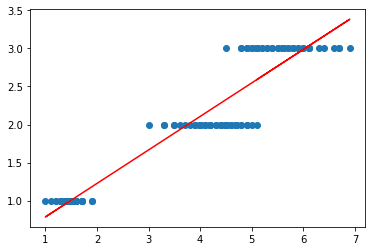

In [ ]:
plt.figure(0)
plt.scatter(xb,yb)
plt.plot(xb, yb_pred, color='Red')